# Revenue Management

You just got appointed as the General manager of a 100-room hotel. The hotel has been running quite successfully, and the current sales department is doing a great job securing a lot of group business far in advance. 

As the General manager eagerly looks at the business for the upcoming 3 months, a sense of satisfaction washes over him. The hotel is filled with over 90 Group rooms on so many days. He is thrilled knowing that the hotel has successfully secured a substantial influx of revenue.

As the month passes, the general manager beams with confidence; groups continue to come in, and guests are often turned away due to the hotel being fully booked. The General manager can't help but think, 'What a fantastic problem to have!'
After 6 months, the owners call in for a meeting. The General manager smiles, "Great! This is an opportunity to showcase the good results."

At the meeting, the owners introduce their Revenue manager. The meeting starts, and he exclaims that the hotel has been losing market share, and financial results are falling short of their expectations.

Thoughts start swirling through the General manager's mind," How could this be? The hotel had been thriving, consistently filling over 90 rooms with groups. They hadn't lost a single group to a competitor". The general manager's mind races, trying to make sense of the contradiction.

The Revenue manager continues, shedding light on the root cause of the problem. The excessive reliance on group bookings has prevented the hotel from capturing other lucrative market segments, resulting in missed revenue opportunities and a decline in market share.

The General manager realizes the gravity of the problem; his initial smile and eagerness to highlight the hotel's achievements, transform into a determined expression. He set his mind to diving into the world of revenue management. He understands that mastering revenue management holds the key to revitalizing the hotel's market share, unlocking untapped revenue potential.

#  What is Revenue Management

The initial story echoes some of the daily complexities that hotels and many other businesses face.

The hotel has 100 rooms to sell. Unlike many other industries, they cannot increase or decrease supply to accommodate the demand. Therefore, the management team is faced with a dilemma:
> Do I take this lower-paying business in advance and secure the revenue, or do I wait for a potential higher-paying guest that might or might not turn up?

Making the wrong decision could be very costly.

This is where Revenue management comes into place. Revenue management is a business approach to balance supply and demand to maximize revenue. This might sound complicated, but it essentially provides a strategic answer to the above dilemma.
Revenue managers have two strategic levers they can use to optimize revenue:
- **Capacity control**: How many rooms to allocate to each segment
- **Pricing**: What price to charge for each segment

The beforementioned story highlights a problem that can be solved using the Revenue management capacity control lever. Using capacity control models, revenue managers can decide how many groups room nights to sell in advance while keeping enough rooms for higher-paying guests.

This workbook will explore the concept and math behind the capacity control models.

# Capacity Control Models

As previously explored, the wrong capacity allocation decision can be costly for the hotel.

In the story, the general manager used a mental model to make the decisions; the more group the better because it translates to sure revenue influx.

**Mental models** are not great at making Capacity control decisions because they tend to be biased. The general manager used his own risk aversion bias to favor the certainty of a group over the uncertainty of more lucrative market segments, resulting in suboptimal performance. 

Fortunately, mathematics and decision science can solve this problem for us.

## Decision science: Expected revenue

The term decision science might sound very daunting, and it can get complex. However, we can think of it as when faced with a particular problem and variables, what is the optimal course of action.

In the capacity control model, we have established that

- The problem is: How to decide if we should sell the rooms to a group or transient. 
- The variables are: the number of rooms to set aside for higher-paying guests.
- The optimal solution would be to set aside enough rooms for the higher-paying guest and sell the remaining to groups.

However, the demand for higher-paying guests is uncertain. Revenue managers can use the principles of probability theory and expected value to reduce uncertainty.

Expected Value refers to the anticipated average value for an outcome.

In the context of Capacity control models, we use  Expected revenue; this is a valuable metric because it helps revenue managers assess the average performance of different courses of action. This average performance allows for better decision-making by considering the potential risks and rewards associated with each option

Mathematically, the expected revenue (ER) can be calculated using the formula:

>ER = (Outcome Revenue * Probability)

Back to our story, imagine the General manager decides to set aside 60 rooms for high-paying guest, if we know the probability of selling 60 rooms to high-paying guests ( let’s say it is 50%) and we know the price they are paying(for example $150), we can establish how much revenue this course of action would generate on average.

>Outcome revenue = 60*150 = 9 000

>ER = 9 000 * 0.5 = 4 500

In this example, this course of action generates, on average 4 500; some days it will be more than 4 500, and some days it will be less. But knowing that we can expect to generate 4 500, we can make a more informed decision. 

If a group revenue is higher than 4 500, we take the group; if not, the hotel is better off keeping the rooms for higher-paying guests.


At this point, you might be thinking, this is all great, but how I can calculate the probability of selling any given room to a high-paying guest? And how should I decide if I need to set aside 59 or 60 rooms?

This is the part where the Revenue managers will rely on their Revenue Management systems to make decisions. Revenue Management systems can deal with complex data and complex capacity control models; however, the Revenue manager must understand the basic model behind the system.

The rest of the notebook will focus on demystifying the capacity control model and providing you with a simplified approach that can be readily implemented. By grasping the core principles of the model, you will be equipped to make strategic decisions even in the absence of advanced technology.




# First Capacity control model

As with everything revenue managers and revenue management systems do, let's first look at historical data.

To solve our problem, we need to gather daily Segmentation room nights and rates.


The data we will use is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. It can be found in kaggle:https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Before we start solving the problem, let's explore the data

## Data exploration

In [9]:
pip install seaborn

     |████████████████████████████████| 296kB 4.1MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 8.9MB/s eta 0:00:01
     |████████████████████████████████| 12.4MB 71.5MB/s eta 0:00:01
     |████████████████████████████████| 9.2MB 67.1MB/s eta 0:00:01
     |████████████████████████████████| 348kB 72.3MB/s eta 0:00:01
     |████████████████████████████████| 235kB 77.8MB/s eta 0:00:01
     |████████████████████████████████| 512kB 65.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 72.8MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 57.4MB/s eta 0:00:01
     |████████████████████████████████| 61kB 80.8MB/s eta 0:00:01
     |████████████████████████████████| 4.7MB 55.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 92.0MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 64.3MB/s eta 0:00:01
ERROR: refractio 2.1.5.4 has requirement pandas==2.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: mlflow 2.10.0 h

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib created a temporary cache directory at /tmp/matplotlib-zsewu_5n because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
from scipy.stats import shapiro
from scipy.stats import gamma

In [4]:
%matplotlib inline

In [9]:
from snowflake.snowpark.session import Session
import configparser

import warnings
warnings.filterwarnings("ignore")

config = configparser.ConfigParser()
config.read("snowflake_connection_AKSHAYA.ini")

connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}

def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

session = snowflake_connector(connection_parameters)

connection successful!


In [11]:
data = session.table("BOOKINGS_TRANSFORMED").to_pandas()

In [12]:
data.head()

,ARRIVAL_DATE_TRANSFORMED,RESERVATION_STATUS_DATE_TRANSFORMED,HOTEL,IS_CANCELED,LEAD_TIME,ARRIVAL_DATE_YEAR,MONTH,ARRIVAL_DATE_WEEK_NUMBER,ARRIVAL_DATE_DAY_OF_MONTH,EXPECTED_ARRIVAL_DATE,...,MARKET_SEGMENT,DISTRIBUTION_CHANNEL,PREVIOUS_CANCELLATIONS,PREVIOUS_BOOKINGS_NOT_CANCELED,RESERVED_ROOM_TYPE,ASSIGNED_ROOM_TYPE,DEPOSIT_TYPE,DAYS_IN_WAITING_LIST,CUSTOMER_TYPE,ADR
0,2021-07-16,2020-10-17,City Hotel,1,272,2021,7,29,16,16-07-2021,...,Groups,TA/TO,1,0,A,A,No Deposit,0,Transient.Party,62.8
1,2021-08-20,2020-10-17,City Hotel,1,307,2021,8,34,20,20-08-2021,...,Groups,TA/TO,1,0,A,A,No Deposit,0,Transient.Party,62.8
2,2021-07-02,2020-10-17,City Hotel,1,258,2021,7,27,2,02-07-2021,...,Groups,TA/TO,1,0,A,A,No Deposit,0,Transient.Party,62.8
3,2021-08-20,2020-10-17,City Hotel,1,307,2021,8,34,20,20-08-2021,...,Groups,TA/TO,1,0,A,A,No Deposit,0,Transient.Party,62.8
4,2021-07-23,2020-10-17,City Hotel,1,279,2021,7,30,23,23-07-2021,...,Groups,TA/TO,1,0,A,A,No Deposit,0,Transient.Party,62.8


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ARRIVAL_DATE_TRANSFORMED             109711 non-null  object 
 1   RESERVATION_STATUS_DATE_TRANSFORMED  109711 non-null  object 
 2   HOTEL                                109711 non-null  object 
 3   IS_CANCELED                          109711 non-null  int8   
 4   LEAD_TIME                            109711 non-null  int16  
 5   ARRIVAL_DATE_YEAR                    109711 non-null  int16  
 6   MONTH                                109711 non-null  int8   
 7   ARRIVAL_DATE_WEEK_NUMBER             109711 non-null  int8   
 8   ARRIVAL_DATE_DAY_OF_MONTH            109711 non-null  int8   
 9   EXPECTED_ARRIVAL_DATE                109711 non-null  object 
 10  RESERVATION_STATUS                   109711 non-null  object 
 11  RESERVATION_S

In [5]:
#lets create a arrival date column(Changed as date is alrea)
data['date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['MONTH'] + '-' + data['arrival_date_day_of_month'].astype(str))
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


For our problem, we are only interested in bookings that actually stayed. Therefore let's explore the `is_canceled` column and remove any canceled booking as well as any `no-show` reservation.

In [6]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [7]:
data['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [8]:
# make a copy for exploration
df = data[(data['is_canceled'] == 0) & (data['reservation_status'] !='No-Show')] 

df['is_canceled'].value_counts()

0    75166
Name: is_canceled, dtype: int64


### Simplifying the problem

As this workbook aims to demystify the capacity control model and provide you with a simplified approach that can be readily implemented, we will make some assumptions to simplify the problem.

>Ignore the length of stay by assuming all arrivals are for one night only 

>Look only at Transient vs Group

In another workbook, we will expand the optimization to account for different lengths of stays and more segments



In [9]:
#Selecting columns needed for our model
df = df[['hotel','date','market_segment','adr']]

df.head()

,hotel,date,market_segment,adr
0,Resort Hotel,2015-07-01,Direct,0.0
1,Resort Hotel,2015-07-01,Direct,0.0
2,Resort Hotel,2015-07-01,Direct,75.0
3,Resort Hotel,2015-07-01,Corporate,75.0
4,Resort Hotel,2015-07-01,Online TA,98.0


In [10]:
df.hotel.value_counts()

City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

Before we continue, lets separate the data into `city` and `resort'

In [11]:
city = df[df.hotel=='City Hotel'].iloc[:,1:].reset_index(drop=True)
resort = df[df.hotel=='Resort Hotel'].iloc[:,1:].reset_index(drop=True)

In [12]:
city.head()

,date,market_segment,adr
0,2015-07-01,Offline TA/TO,0.00
1,2015-07-02,Groups,58.67
2,2015-07-03,Groups,86.00
3,2015-07-03,Groups,43.00
4,2015-07-03,Groups,86.00


### Exploring the City Hotel data

In the next steps we will explore the city hotel segmentation data.

If we think back to our story, we established that the excessive reliance on group bookings prevented the hotel from capturing other lucrative market segments.

Let's look at ADR by Segment to see if indeed Group ADR is lower than other segments



In [13]:
# Create a dictionary mapping child product names to their parent product names
parent_product_mapping = { 'Groups': 'Group'}


# Create a new column 'Parent Product' based on the mapping
city['Segment'] = np.where(city['market_segment'].isin(parent_product_mapping.keys()),
                                city['market_segment'].map(parent_product_mapping),
                                'Transient')


grouped_data = city.groupby('Segment')

In [14]:
total_transactions = grouped_data.size()

# Calculate the ADR per segment
average_price = grouped_data['adr'].mean()

# Create a summary dataframe
summary_df = pd.DataFrame({'Total Arrivals': total_transactions, 'ADR': average_price})

print(summary_df)

           Total Arrivals         ADR
Segment                              
Group                4352   84.343787
Transient           41876  107.970187


From the table above we can indeed see that the group segment has a lower ADR than Transient.

Therefore this hotel will greatly benefit from implementing capacity control model to ensure there are enough rooms to sell to our higher paying transient guest.

So far we have only looked at aggregate data, however hotels tend to have very distinct seasonality.
The next part of our exploration will be on the hotel seasonality

### Exploring Seasonality

Before we can implement our Capacity control model, we need to explore the arrival data.
Particularly, we are interested in identifying the different seasonality and the shape of the distributions for those seasonality

In [15]:
# grouping by arrival data and segment to get total arrival for each day

city_arrivals =city.groupby(['date','Segment']).size().reset_index(name='num_arrivals')
#city_arrivals.set_index('date',inplace=True)
city_arrivals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1043 non-null   datetime64[ns]
 1   Segment       1043 non-null   object        
 2   num_arrivals  1043 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.6+ KB


In [16]:
#Create Month and DOW column for trend visualization
city_arrivals['month'] = city_arrivals['date'].dt.strftime('%B')
city_arrivals['day_of_week'] = city_arrivals['date'].dt.dayofweek
city_arrivals['weekday_weekend'] = city_arrivals['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [17]:
#Group the data by month and segment and calculate the Avg number of arrivals in each month-segment combination:
monthly_segment_df = city_arrivals.groupby(['month', 'weekday_weekend','Segment'])['num_arrivals'].mean().reset_index()


In [18]:
monthly_segment_df.head()

,month,weekday_weekend,Segment,num_arrivals
0,April,Weekday,Group,16.642857
1,April,Weekday,Transient,64.317073
2,April,Weekend,Group,8.285714
3,April,Weekend,Transient,57.210526
4,August,Weekday,Group,17.600000


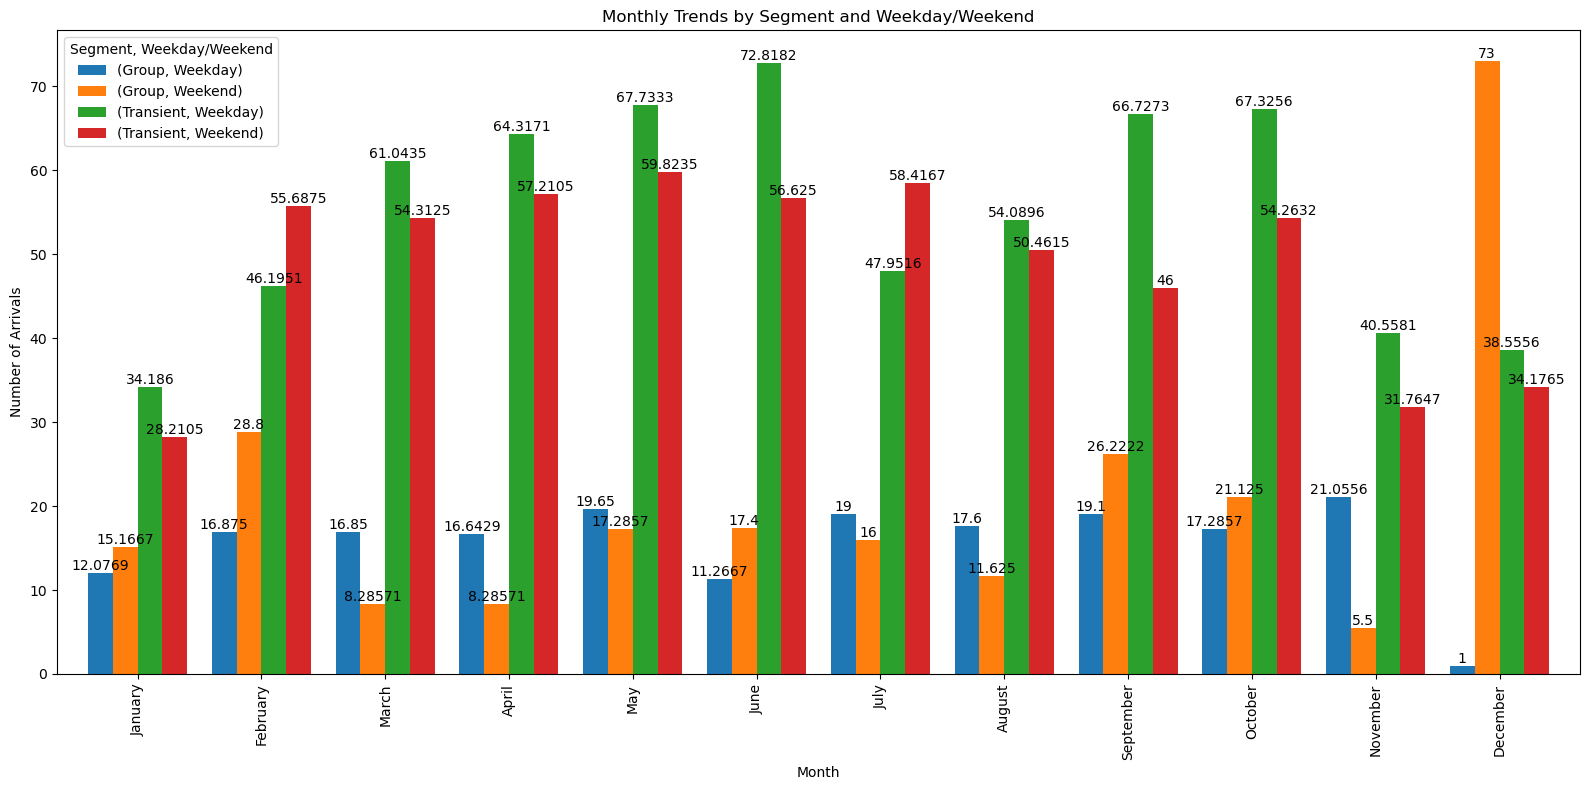

In [19]:
# Map month names to month numbers for sorting
month_order = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

monthly_segment_df['month'] = pd.Categorical(monthly_segment_df['month'], categories=month_order.keys(), ordered=True)
monthly_segment_df = monthly_segment_df.sort_values('month')

# Pivot the dataframe to have separate columns for each segment and weekday/weekend
pivot_df = monthly_segment_df.pivot(index='month', columns=['weekday_weekend', 'Segment'], values='num_arrivals')

# Reorder the columns to have the desired order
pivot_df = pivot_df.reorder_levels([1, 0], axis=1).sort_index(axis=1)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(16, 8))

pivot_df.plot(kind='bar', ax=ax, width =0.8)

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Arrivals')
ax.set_title('Monthly Trends by Segment and Weekday/Weekend')

# Set legend
ax.legend(title='Segment, Weekday/Weekend')
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()





We see that Transient and group have different demand patterns.

**Transient** arrivals generally are stronger on the weekdays, except in February and July. We can also see that Transient arrivals peak in May - June and Sept - October, representing this hotel's peak demand period. On the contrary, the low season span from November to January.

**Group** arrivals do not have a clear Yearly seasonality. There seem to be some extreme values in December.

With the above information, we could already make a better mental model; the hotel could have fewer rooms set aside for transients from November to Jan, and increase the number of rooms during the peak season.

However, as we have seen, mental models are biased; therefore, we going to use probability theory, and to do so, we need to explore the distribution of the data.


Next we will explore the distributions

###  Transient arrival distribution

We have determined that to make a capacity control model, we need to be able to calculate the probability of any number of rooms being sold to transients.

To calculate those probabilities, we need to study the shape of the distribution.

Typically, in many problems, a normal distribution is assumed due to its well-defined characteristics based on mean and standard deviation, and its prevalence in various scenarios.

However, there is a potential issue with using a normal distribution in our case. The normal distribution does not have a lower or upper limit, which could lead to the possibility of negative arrivals. It is known that the number of arrivals cannot be negative.

Nevertheless, let us analyze the data and assess whether it conforms to a normal distribution. To accomplish this, we will plot the distribution of arrivals and conduct the Shapiro-Wilk test, which is a statistical test used to evaluate the normality of a dataset.


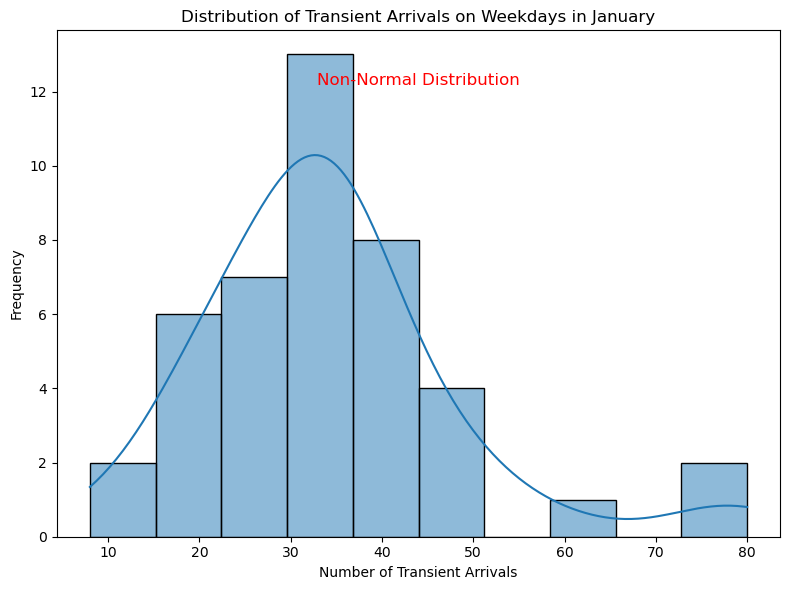

In [20]:
df_transient_january = city_arrivals[(city_arrivals['Segment'] == 'Transient') & (city_arrivals['month'] == 'January') &(city_arrivals['weekday_weekend'] == 'Weekday')]


statistic, p_value = shapiro(df_transient_january ['num_arrivals'])


fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_transient_january , x='num_arrivals', bins=10, kde=True, ax=ax)

# Set labels and title
ax.set_xlabel('Number of Transient Arrivals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transient Arrivals on Weekdays in January')


# Add text annotation for normality test result
if p_value > 0.05:
    ax.text(0.5, 0.9, 'Normal Distribution', transform=ax.transAxes, ha='center', va='center', fontsize=12, color='green')
else:
    ax.text(0.5, 0.9, 'Non-Normal Distribution', transform=ax.transAxes, ha='center', va='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

As we can see from the shape of the distribution and the results of the Shapiro-Wilk test, the arrival data is not normally distributed. Instead the data seems to be skewed to the right.

Given that the normal distribution is not suitable for our problem, an alternative approach is to explore the Gamma Distribution.

The Gamma distribution is a widely recognized probability distribution that is often employed to model positive-valued data with a right-skew. One of the primary advantages of the Gamma distribution is its flexibility in fitting the shape of the data.


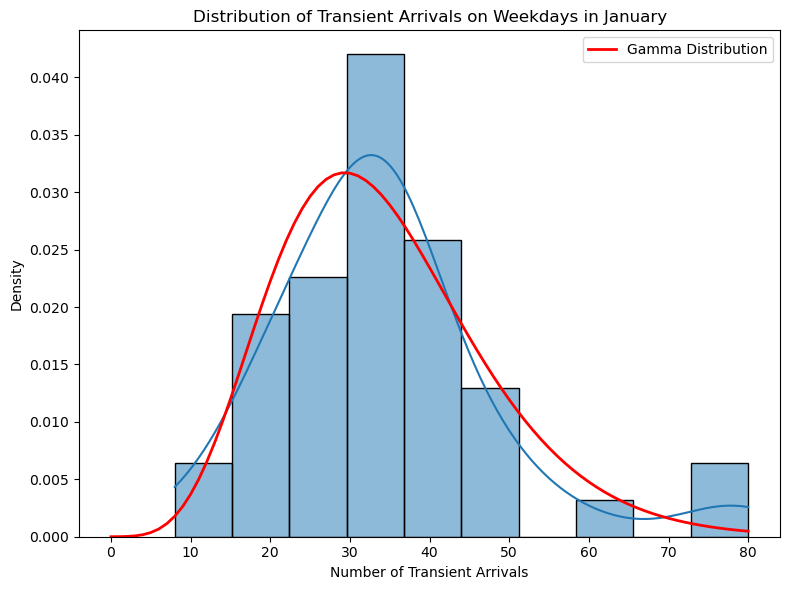

In [21]:

# Fit gamma distribution to the data
shape, loc, scale = gamma.fit(df_transient_january['num_arrivals'])

# Generate values from the fitted gamma distribution
x = range(0, int(df_transient_january['num_arrivals'].max()) + 1)
y = gamma.pdf(x, shape, loc, scale)

# Plot the histogram and fitted gamma distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df_transient_january, x='num_arrivals', bins=10, kde=True, ax=ax, stat='density')
ax.plot(x, y, 'r-', lw=2, label='Gamma Distribution')

# Set labels and title
ax.set_xlabel('Number of Transient Arrivals')
ax.set_ylabel('Density')
ax.set_title('Distribution of Transient Arrivals on Weekdays in January')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


From the above graph, we can establish that the Gamma distribution fits our data quite well.

In the context of the gamma distribution, the parameters shape, loc, and scale represent the characteristics of the distribution. Those parameters can be used to calculate the probabilities


1. Shape Parameter (a or k):
   - The shape parameter determines the shape of the gamma distribution.
   - It controls the skewness and the peak of the distribution.
   - Higher values of the shape parameter result in a more right-skewed distribution with a higher peak.

2. Scale Parameter (b or θ):
   - The scale parameter determines the scale or spread of the gamma distribution.
   - It represents the average amount of change or time until the event of interest occurs.
   - Larger values of the scale parameter lead to a broader distribution with a larger spread of values.

3. Location Parameter (c or μ):
   - The location parameter represents a shift or translation of the distribution along the x-axis.
   - It is optional and is often set to zero by default.
   - The location parameter allows the distribution to be shifted horizontally.


Now that we have established that we can use Gamma distribution, we can start building or Capacity Control model

## Capacity Control Model - Application

### Generating shape, loc and scale paramaters by Month & DOW


In [22]:
# Get unique combinations of month, weekday_weekend
unique_combinations = city_arrivals[['month', 'weekday_weekend']].drop_duplicates()

# get transient data only
transient_df = city_arrivals[(city_arrivals['Segment'] == 'Transient')]

# Initialize empty dictionary to store gamma parameters
gamma_parameters = {}

# Iterate over unique combinations
for index, row in unique_combinations.iterrows():
    month = row['month']
    weekday_weekend = row['weekday_weekend']
    
    # Filter the dataframe for the specific combination
    filtered_df = transient_df[(transient_df['month'] == month) & (transient_df['weekday_weekend'] == weekday_weekend)]
    
    # Fit gamma distribution and obtain parameters
    shape, loc, scale = gamma.fit(filtered_df['num_arrivals'])
    
    # Store gamma parameters in dictionary
    gamma_parameters[(month, weekday_weekend)] = (shape, loc, scale)

# Print the gamma parameters for each combination
for combination, parameters in gamma_parameters.items():
    print(combination, ":", parameters)

('July', 'Weekday') : (338.28148283339056, -551.7817705174871, 1.7723106073002404)
('July', 'Weekend') : (1099.4991203237685, -894.9280142493706, 0.8670602583106841)
('August', 'Weekend') : (495.8515936036315, -490.58347883650003, 1.0909526721823601)
('August', 'Weekday') : (411.63848062898774, -379.3013038782017, 1.0525742645343739)
('September', 'Weekday') : (29.06476888705344, -66.0485211702728, 4.568272872063844)
('September', 'Weekend') : (4.525302242501823, -6.062511793587406, 11.50475703580225)
('October', 'Weekday') : (4.626930525237684, 5.928401372951116, 13.269529541893935)
('October', 'Weekend') : (4.282770254813147, 0.14978921180961852, 12.635134769365767)
('November', 'Weekend') : (0.7909799132582722, 6.999999999999998, 27.93873442681083)
('November', 'Weekday') : (1.1558250899951625, 10.861833072317156, 25.692747236900463)
('December', 'Weekday') : (2.1288559839719703, 3.688939571416932, 16.378100396111293)
('December', 'Weekend') : (48.17579918068469, -82.71629805710359,

Using the above table we can use the probability of having X or less arrivals for any month and weekday/end combination.

Example:

In [23]:
# Probabilty of less than 20 arrivals in Weekdays January
shape, loc, scale = gamma_parameters[('January', 'Weekday')]

print("Probability of at least 20 arrivals:",gamma.cdf(20, shape, scale))

Probability of at least 20 arrivals: 0.9884365881402576


This is great, however, let's think back to our problem, knowing the probability of selling less than any number of rooms will not be helpful. If our hotel has 100 rooms, the likelihood of selling less than 100 rooms is 100%.

Therefore, we want to calculate the probabilty of selling more than any number of rooms.

We will use the complement of the CDF function, called the Survivor function, to calculate this.

By considering the complement of the CDF, we focus on the tail of the distribution, which represents the probability of exceeding a specific threshold.

This approach aligns with the goal of our capacity control model, as we are interested in determining the probability of selling more rooms to transients rather than fewer. By utilizing the Survivor function, we can effectively estimate the likelihood of meeting or surpassing different room allocation scenarios.


In [24]:
# Calculate the survivor function using the gamma distribution parameters
survivor_prob = gamma.sf(20, shape, loc, scale)

# Print the survivor probability
print("Probability of more than 20 arrivals:", survivor_prob)

Probability of more than 20 arrivals: 0.868055095836751


### Expected Revenue

We now have everything we need to calculate the Expected revenue. As a reminder the formulas is a follow:

>ER = (Outcome Revenue * Probability)

let's implement the formula and calculate the number of rooms to set aside for transient in Janruay weekdays.

In [25]:
jan_arr = range(0, int(df_transient_january['num_arrivals'].max()) + 1)

In [26]:
results = []

# Iterate over each arrival value
for arrival in jan_arr:
    # Calculate the survivor probability using the gamma parameters
    survivor_prob = 1 - gamma.cdf(arrival, shape, loc, scale)
    
    # Append the arrival value and survivor probability to the results list
    results.append((arrival, survivor_prob))
    
# Create a DataFrame from the results list
result_df = pd.DataFrame(results, columns=['Arrival', 'Survivor Probability'])

In [27]:
#Calculated expected marginal revenue where outcome is  (107* result_df["Arrival"]) and probability is result_df["Survivor Probability"]
result_df["expeted_Rev"] = (107* result_df["Arrival"]) * result_df["Survivor Probability"]

<Axes: >

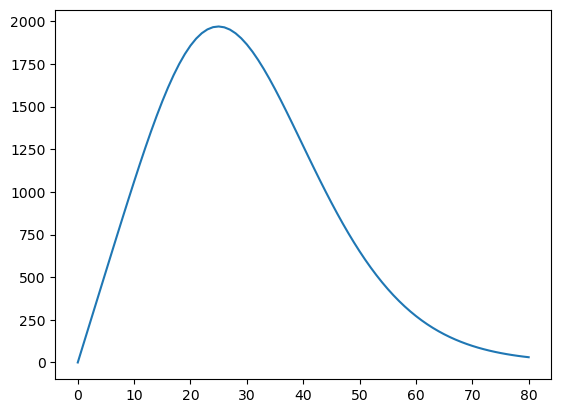

In [28]:
#Plot Expected Revenue
result_df['expeted_Rev'].plot()

In [29]:
result_df[result_df["expeted_Rev"] == max(result_df["expeted_Rev"])]

,Arrival,Survivor Probability,expeted_Rev
25,25,0.736318,1969.649889


From the above graph, we can establish that the Expected Revenue peaks at around 25 rooms, therefore we should keep 25 rooms for transient.

However, we have not yet looked at the revenue the group generates. Remember, in our theory example, we established that we should take the group if the revenue exceeds the ER; if not, the hotel is better off keeping the rooms for higher-paying guests.

We could calculate each group's revenue and compare it to the ER. However, that is not very efficient.

Let's think of this differently, in our 100 rooms hotel, what are the chances that we sell one room to a transient at 107

The probability is 100%; therefore, for the first room, you make 107.

Next, what are the chances of selling 2 rooms? Still 100%, so for the second room, you still make 107.

What are the chances of selling the 20 rooms? From our example above, the probability is  87%; this means that the value of the 20 rooms is:

> 87% * 107 = 93

This is known as the Expected Marginal revenue.

Expected marginal revenue specifically focuses on the incremental revenue generated by selling one additional unit.

Using this, we can keep allocating rooms to Transient as long as the Expected Marginal Revenue exceeds the group rate.

This rule of thumbs is called the **Littlewood's rule


### Littlewood's Rule

Ken Littlewood developed this rule to provide a mathematical answer to a business problem he faced in the airline industry.

He was given two fares, a high fare and a low fare, for a specific flight, and he set to answer the question:

> At what point am I going to stop accepting lower-fare classes?

His rule states:

>You should accept the lower fare class as long as the rate is higher than the expected marginal revenue of the higher fare class.

Mathematically it reads as follows:

>High Fare * Prob > Low Fare


Let's look at an example using January weekdays.
We will assume that the transient rate is:107 and  the group rate is: 84



In [30]:
#calculate Expected marignal rev for each number of arrivals
result_df['expected_marginal_rev'] = result_df['Survivor Probability'] *107


In [31]:
result_df

,Arrival,Survivor Probability,expeted_Rev,expected_marginal_rev
0,0,1.000000,0.000000,106.999971
1,1,0.999997,106.999692,106.999692
2,2,0.999984,213.996585,106.998292
3,3,0.999939,320.980569,106.993523
4,4,0.999822,427.923622,106.980905
...,...,...,...,...
76,76,0.006077,49.418564,0.650244
77,77,0.005337,43.975653,0.571112
78,78,0.004684,39.092198,0.501182
79,79,0.004107,34.716287,0.439447


By examing the table above, we can see that the `marginal expected revenue` falls below 84 ( the group rate) at 24 rooms. This means that the value of the 24th room is less that the value of the group therefore we should keep 23 rooms for transient and sell the rest for groups.

So what does this mean for the hotel?

This information can then be communicated to the sales team to develop the group strategy. At the current Transient & Group rates for January weekdays, we should keep 23 rooms for transient and the rest should be open to sell for group.

This information will help the team make better decisions and overcome some of the mental models biases.


So far we have done the Capacity control rules manually, however this is not very efficient. 

Fortunately for us we can use simple algebra to transform Littlewood's rule into a formula

> High Fare * Prob > Low Fare

> Prob > Low Fare/ High Fare

We now need to identify at what point the probability of selling more than x number of rooms is higher than lower fare/higher fare.
We can now use the inverse of the survivor function to estimate the number of rooms to set aside for any given probability


In [32]:
# Calculate the number for rooms to set aside for transient

probability = 84/107

# Calculate the number of arrivals corresponding to the given probability
num_arrivals = gamma.isf(probability, shape,loc, scale)
num_arrivals

23.30300828854896

Using the inverse of the survivor function we come up with the same number as we did manually.

We are now ready to create a table with the transient protection levels for each month & weekday/end combination 

### Final model

Before we can implement the model for each month, we need to calculate the Transient and Group ADR so that we can calculate the probability to input the the `inverse survivor function`

In [33]:
#Calculates the total arrivals and Revenue for each day
city_ADR = city.groupby(['date', 'Segment']).agg({'Segment': 'count', 'adr': 'sum'})
city_ADR.columns = ['Arrivals', 'Revenue']
city_ADR = city_ADR.reset_index()
city_ADR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1043 non-null   datetime64[ns]
 1   Segment   1043 non-null   object        
 2   Arrivals  1043 non-null   int64         
 3   Revenue   1043 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.7+ KB


In [34]:
#add Month and Weekday/weekend
city_ADR['month'] = city_ADR['date'].dt.strftime('%B')
city_ADR['day_of_week'] = city_ADR['date'].dt.dayofweek
city_ADR['weekday_weekend'] = city_ADR['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [35]:
#Group the data by month and weekeday/weekend
city_ADR = city_ADR.groupby(['month','weekday_weekend', 'Segment']).agg({'Arrivals': 'sum', 'Revenue': 'sum'})

In [36]:
#calculate the ADR for each Month, Weekday/Weekend for each segment. This will be used to calculate the Propability
city_ADR['ADR'] = city_ADR['Revenue']/city_ADR['Arrivals']
city_ADR

Arrivals    Revenue         ADR
month     weekday_weekend Segment                                   
April     Weekday         Group           233   21577.58   92.607639
                          Transient      2637  298206.69  113.085586
          Weekend         Group            58    5836.41  100.627759
                          Transient      1087  123484.47  113.601168
August    Weekday         Group           352   27923.75   79.328835
                          Transient      3624  438988.09  121.133579
          Weekend         Group            93    7463.17   80.249140
                          Transient      1312  162800.41  124.085678
December  Weekday         Group             3     292.90   97.633333
                          Transient      1735  151778.21   87.480236
          Weekend         Group            73    4912.00   67.287671
                          Transient       581   53170.27   91.515095
February  Weekday         Group           135    9846.33   72.935778
                          Transient      1894  165855.16   87.568722
          Weekend         Group           144    9941.00   69.034722
                          Transient       891   78422.30   88.016049
January   Weekday         Group           157   11344.00   72.254777
                          Transient      1470  121284.34   82.506354
          Weekend         Group            91    6836.25   75.123626
                          Transient       536   45725.48   85.308731
July      Weekday         Group           247   20476.30   82.900000
                          Transient      2973  352077.76  118.425079
          Weekend         Group           160   12272.80   76.705000
                          Transient      1402  167799.28  119.685649
June      Weekday         Group           169   14768.13   87.385385
                          Transient      3204  380414.00  118.730961
          Weekend         Group            87    7306.49   83.982644
                          Transient       906  111398.64  122.956556
March     Weekday         Group           337   30121.49   89.381276
                          Transient      2808  252382.57   89.879833
          Weekend         Group            58    4720.98   81.396207
                          Transient       869   79950.14   92.002463
May       Weekday         Group           393   39520.53  100.561145
                          Transient      3048  373313.10  122.478051
          Weekend         Group           121   11015.86   91.040165
                          Transient      1017  127672.02  125.537876
November  Weekday         Group           379   26559.14   70.076887
                          Transient      1744  156923.52   89.979083
          Weekend         Group            33    2366.67   71.717273
                          Transient       540   47355.90   87.696111
October   Weekday         Group           242   21247.72   87.800496
                          Transient      2895  301377.15  104.102642
          Weekend         Group           169   12702.59   75.163254
                          Transient      1031  105944.75  102.759214
September Weekday         Group           382   36323.67   95.088141
                          Transient      2936  338336.86  115.237350
          Weekend         Group           236   21688.40   91.900000
                          Transient       736   86698.43  117.796780

Now that we have the ADRs, the next step is to calculate the Ratio of

>Group ADR/ Transient ADR

this will be our probability input for the `inverse survivor function`

In [37]:
# Pivot the DataFrame to calculate the ratio of Group ADR and Transient ADR
ratio_df = pd.pivot_table(city_ADR, values='ADR', index=['month', 'weekday_weekend'], columns='Segment', aggfunc='sum', fill_value=0)

ratio_df['Probability'] = ratio_df['Group'] / ratio_df['Transient']

ratio_df.head()

Segment                        Group   Transient  Probability
month    weekday_weekend                                     
April    Weekday           92.607639  113.085586     0.818916
         Weekend          100.627759  113.601168     0.885799
August   Weekday           79.328835  121.133579     0.654887
         Weekend           80.249140  124.085678     0.646724
December Weekday           97.633333   87.480236     1.116062

Next step is to get the gamma parameters.

In [38]:
gamma_df = pd.DataFrame.from_dict(gamma_parameters, orient='index', columns=['shape', 'loc', 'scale'])


gamma_df['index'] = gamma_df.index

# Unpack the 'index' column into separate columns 'month' and 'weekday_weekend'
gamma_df[['month', 'weekday_weekend']] = gamma_df['index'].apply(lambda x: pd.Series(x))

# Drop the 'index' column
gamma_df.drop('index', axis=1, inplace=True)

gamma_df.reset_index(inplace=True,drop=True)


In [39]:
#Merge gama parameters with ratio_df
merged_df = gamma_df.merge(ratio_df, on=['month', 'weekday_weekend'])

merged_df = merged_df[['month', 'weekday_weekend'] + [col for col in merged_df.columns if col not in ['month', 'weekday_weekend']]]

In [40]:
merged_df['month'] = pd.Categorical(merged_df['month'], categories=month_order.keys(), ordered=True)
merged_df = merged_df.sort_values('month').reset_index(drop= True)

In [41]:
merged_df['Transient_protection'] = gamma.isf(merged_df["Probability"], merged_df['shape'],merged_df['loc'],merged_df['scale'])

In [42]:
merged_df


,month,weekday_weekend,shape,loc,scale,Group,Transient,Probability,Transient_protection
0,January,Weekend,2.340594,13.474148,6.296006,75.123626,85.308731,0.880609,18.430621
1,January,Weekday,7.571638,-2.521539,4.848038,72.254777,82.506354,0.875748,19.649125
2,February,Weekend,0.964218,34.000000,22.503081,69.034722,88.016049,0.784342,39.050370
3,February,Weekday,3.733185,9.762075,9.759240,72.935778,87.568722,0.832898,28.616672
4,March,Weekend,2.183834,31.592258,10.403842,81.396207,92.002463,0.884718,38.688425
5,March,Weekday,27.102337,-4.995336,2.434362,89.381276,89.879833,0.994453,33.216590
6,April,Weekend,58.430750,-31.750422,1.522300,100.627759,113.601168,0.885799,43.448465
7,April,Weekday,9.436899,15.213384,5.203372,92.607639,113.085586,0.818916,49.728101
8,May,Weekday,29.799804,-25.462713,3.127405,100.561145,122.478051,0.821054,51.967149
9,May,Weekend,1020.863569,-491.722139,0.540247,91.040165,125.537876,0.725201,49.354173


Lets do some final clean up to before we can share the table with the sales team.

In [43]:
transient_protection = merged_df[['month','weekday_weekend','Group','Transient','Transient_protection']]
transient_protection['Transient_protection'] = transient_protection['Transient_protection'].fillna(0)

transient_protection[['Group', 'Transient', 'Transient_protection']] = transient_protection[['Group', 'Transient', 'Transient_protection']].round(0).astype(int)

/tmp/ipykernel_20/2981390268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection['Transient_protection'] = transient_protection['Transient_protection'].fillna(0)
/tmp/ipykernel_20/2981390268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection[['Group', 'Transient', 'Transient_protection']] = transient_protection[['Group', 'Transient', 'Transient_protection']].round(0).astype(int)


In [44]:
transient_protection.rename(columns={'Group': 'Group_ADR','Transient':'Transient_ADR'},inplace=True)

transient_protection

/tmp/ipykernel_20/2082567129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transient_protection.rename(columns={'Group': 'Group_ADR','Transient':'Transient_ADR'},inplace=True)


,month,weekday_weekend,Group_ADR,Transient_ADR,Transient_protection
0,January,Weekend,75,85,18
1,January,Weekday,72,83,20
2,February,Weekend,69,88,39
3,February,Weekday,73,88,29
4,March,Weekend,81,92,39
5,March,Weekday,89,90,33
6,April,Weekend,101,114,43
7,April,Weekday,93,113,50
8,May,Weekday,101,122,52
9,May,Weekend,91,126,49


We have created an easy-to-understand table that can be used to make better capacity control decisions instead of relying on mental models.

Let's think back to the initial story. The General manager can now look at the business on the books and ensure he communicates to the sales team when it is time to stop selling rooms to groups and confidently explain why he is making this decision.


## Final considerations

As mentioned, this notebook aims to demystify capacity control models. To do so, we have created a simple yet effective capacity control model using Littlewood's rule.

To explain the concepts, we did make some assumptions to simplify the problem, such as considering all arrivals as 1 night, only looking at Transient vs Group,  and using fixed rates.

But in reality, we have to optimize across more than 2 segments, rates are almost infinite, and more importantly, rate changes impact the probabilities of room sales.

Our model can still be used to make better and less biased decisions despite its simplicity.

As with any model, the output should not be treated as a line you cannot cross. Ultimately, a hotel is a business, and you need to consider other factors to make better decisions; this model is only the first step.

I have used similar models to set maximum group limits for different seasons. That doesn't mean we could not take more groups, but these limits served as a signal to the sales team; if the group was over the limit, we wanted to review the group more closely.

Suppose you are looking to implement a similar model to your hotel. In that case, I recommend spending more time doing further data cleaning. For this notebook, we kept it simple; however, you might want to look into outliers and how to treat them. 
Also, you probably want to break down your seasonality and include special events; for example, the demand pattern during Christmas and NY is likely very different from the rest of December.

If you want to dig deeper into more complex models, you can do some research on ESMR (Expected Marginal Seat Revenue) & Dynamic pricing models.

